# Apartment Market Analysis (EDA & Modeling)

This notebook covers the Exploratory Data Analysis (EDA) of data scraped from real estate portals and experimenting with model training for apartment price prediction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add project root to path for imports
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.model.train_model import parse_area, parse_disposition, clean_region

%matplotlib inline

## 1. Load Data

In [2]:
df = pd.read_csv('../data/raw/apartments_raw_data.csv')
print(f"Loaded {len(df)} ads.")
df.head()

Loaded 10160 ads.


,title,url,raw_price,location
0,Prodej bytu 1+kk 42 m²,https://reality.idnes.cz/detail/prodej/byt/slu...,824 500 Kč,"Sluneční pobřeží, Bulharsko"
1,Prodej bytu 1+kk 32 m²,https://reality.idnes.cz/detail/prodej/byt/nes...,1 428 325 Kč,"Nesebar, Bulharsko"
2,Prodej bytu 1+kk 61 m²,https://reality.idnes.cz/detail/prodej/byt/nes...,1 697 500 Kč,"Nesebar, Bulharsko"
3,Prodej bytu 2+kk 72 m²,https://reality.idnes.cz/detail/prodej/byt/san...,5 031 875 Kč,"Santa Maria, Kapverdy"
4,Prodej bytu 3+kk 110 m²,https://reality.idnes.cz/detail/prodej/byt/tor...,12 052 250 Kč,"Torrox, Málaga, Španělsko"


## 2. Cleaning and Feature Extraction

In [3]:
df['area'] = df['title'].apply(parse_area)
df['disposition'] = df['title'].apply(parse_disposition)
df['region'] = df['location'].apply(clean_region)
df['price'] = df['raw_price'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_clean = df.dropna(subset=['area', 'price']).copy()
df_clean = df_clean[df_clean['price'] > 500000]
df_clean = df_clean[df_clean['price'] < 40000000] # Clean max price outliers
df_clean = df_clean[df_clean['area'] < 300] # Clean max area outliers
print(f"After cleaning, {len(df_clean)} ads remain.")
df_clean.head()

After cleaning, 9553 ads remain.


,title,url,raw_price,location,area,disposition,region,price
0,Prodej bytu 1+kk 42 m²,https://reality.idnes.cz/detail/prodej/byt/slu...,824 500 Kč,"Sluneční pobřeží, Bulharsko",42,1+kk,Other,824500.0
1,Prodej bytu 1+kk 32 m²,https://reality.idnes.cz/detail/prodej/byt/nes...,1 428 325 Kč,"Nesebar, Bulharsko",32,1+kk,Other,1428325.0
2,Prodej bytu 1+kk 61 m²,https://reality.idnes.cz/detail/prodej/byt/nes...,1 697 500 Kč,"Nesebar, Bulharsko",61,1+kk,Other,1697500.0
3,Prodej bytu 2+kk 72 m²,https://reality.idnes.cz/detail/prodej/byt/san...,5 031 875 Kč,"Santa Maria, Kapverdy",72,2+kk,Other,5031875.0
4,Prodej bytu 3+kk 110 m²,https://reality.idnes.cz/detail/prodej/byt/tor...,12 052 250 Kč,"Torrox, Málaga, Španělsko",110,3+kk,Other,12052250.0


## 3. Data Visualization

### Price Distribution by Region

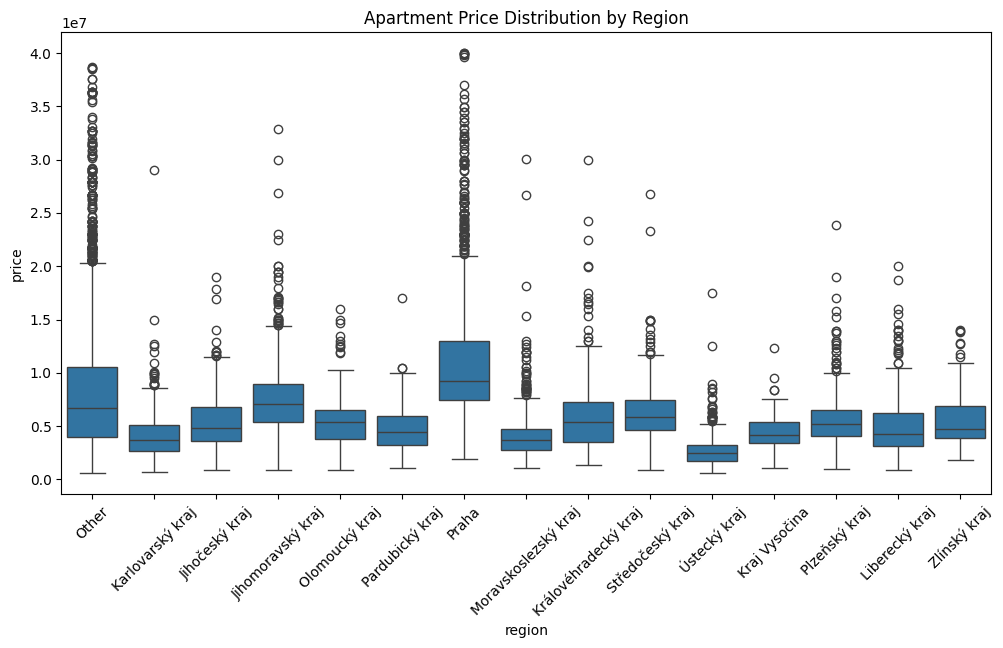

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='price', data=df_clean)
plt.xticks(rotation=45)
plt.title('Apartment Price Distribution by Region')
plt.show()

### Relationship between Area and Price

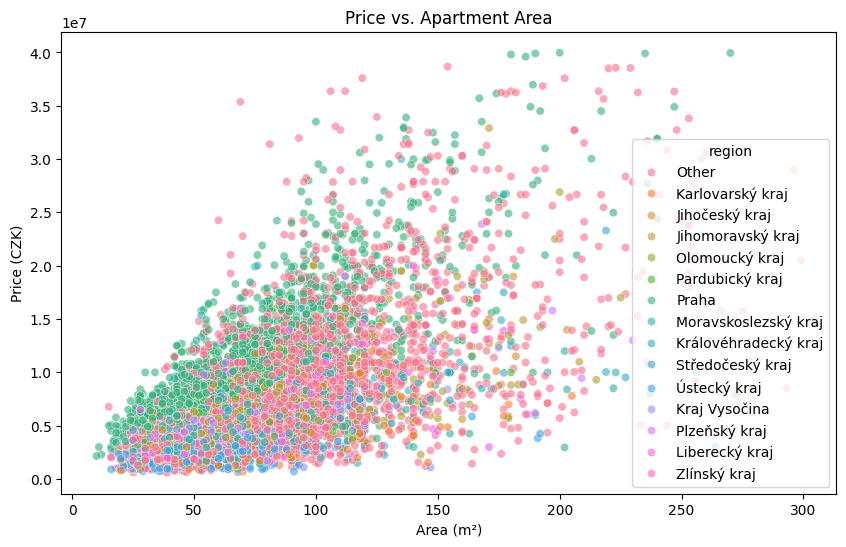

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='region', data=df_clean, alpha=0.6)
plt.title('Price vs. Apartment Area')
plt.xlabel('Area (m²)')
plt.ylabel('Price (CZK)')
plt.show()

## 4. Model Training

In [6]:
from sklearn.ensemble import RandomForestRegressor
features = ['area', 'disposition', 'region']
X = df_clean[features]
y = df_clean['price']
X = pd.get_dummies(X, columns=['disposition', 'region'], drop_first=False)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
print("Model trained successfully.")

Model trained successfully.
